<a href="https://colab.research.google.com/github/uttarakhatri/Sleep-stage-EEG-transitions/blob/main/MNE_preproceesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne


In [ ]:
import os
import mne
import numpy as np
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

In [ ]:
raw= mne.io.read_raw_edf("/content/drive/My Drive/sleep/sleepedf/sc4002e0.edf")
print(raw.info)

Extracting EDF parameters from /content/drive/My Drive/sleep/sleepedf/sc4002e0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-25 14:50:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>


In [ ]:
raw.load_data()
raw.plot()

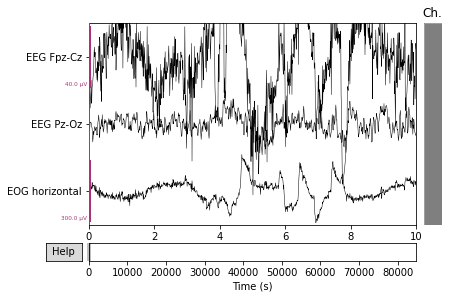

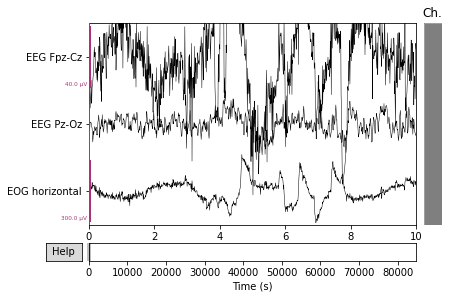

In [ ]:
raw.set_channel_types({'EOG horizontal': 'eog'})
raw.drop_channels(['Resp oro-nasal', 'EMG Submental', 'Temp body', 'Event marker'])
raw.plot()

In [ ]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()

In [ ]:
filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)



<RawEDF | sc4002e0.edf, 3 x 8490000 (84900.0 s), ~194.3 MB, data loaded>

In [ ]:
ica = ICA(method= 'infomax',fit_params=dict(extended=True))
ica.fit(filt_raw)

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting all PCA components: 2 components
Computing Extended Infomax ICA
Fitting ICA took 592.5s.


<ICA  |  raw data decomposition, fit (infomax): 8490000 samples, 2 components, channels used: "eeg">

In [ ]:
mne.preprocessing.run_ica(raw,n_components=None, max_pca_components=None, n_pca_components=None, method= 'fastica')

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:1419: DeprecationWarning: Function run_ica is deprecated; run_ica() is deprecated and will be removed in 0.21, use ICA.detect_artifacts() instead
  warnings.warn(msg, category=DeprecationWarning)


Selecting all PCA components: 2 components
Fitting ICA took 4.8s.
<ICA  |  raw data decomposition, fit (fastica): 8490000 samples, 2 components, channels used: "eeg">
    Now searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    1, 1, 1
    Removing duplicate indices...
Ready.


<ICA  |  raw data decomposition, fit (fastica): 8490000 samples, 2 components, channels used: "eeg", 1 sources marked for exclusion>

In [ ]:
mne.preprocessing.ica_ap

Plotting Power Spectrum

In [ ]:
import numpy as np
import mne
import pandas as pd
edf = mne.io.read_raw_edf('/content/drive/My Drive/sleep/sleepedf/sc4002e0.edf')
header = ','.join(edf.ch_names)
np.savetxt('Sub1_data.csv', edf.get_data().T, delimiter=',', header=header)



In [ ]:
csv= pd.read_csv('Sub1_data.csv')
print(csv)

In [ ]:
import matplotlib.pyplot as plt

sampling_rate = 100.0

time = np.arange(0,84900, 1/sampling_rate)
data = np.genfromtxt('Sub1_data.csv', delimiter=',', usecols=2)

fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))



plt.plot(frequency, power_spectrum)

In [ ]:
print(frequency,power_spectrum)

In [ ]:
from mne import preprocessing
fifa = mne.preprocessing.read_ica('/content/drive/My Drive/sleep/sleepedf/ICA_corrected_s1-ica.fif.gz')
#aru= ica.apply(inst=raw)
#raw1=mne.io.read_raw_edf(aru)
#print(type(aru))




#header = ','.join(edf.ch_names)
#np.savetxt('Sub1_data_ica.csv', edf.get_data().T, delimiter=',', header=header)

#header = ','.join(edf.ch_names)
#np.savetxt('Sub1_data_fif.csv', fif.get_data().T, delimiter=',', header=header)

Transforming to ICA space (2 components)
Zeroing out 0 ICA components


TypeError: ignored

In [ ]:
#fname= aru + 'Lol_raw.fif'
raw.save('lol_raw.fif')


Writing /content/lol_raw.fif
Closing /content/lol_raw.fif [done]


Opening raw data file lol_raw.fif...
Isotrak not found
    Range : 0 ... 8489999 =      0.000 ... 84899.990 secs
Ready.
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


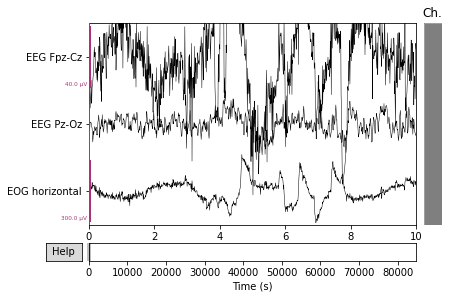

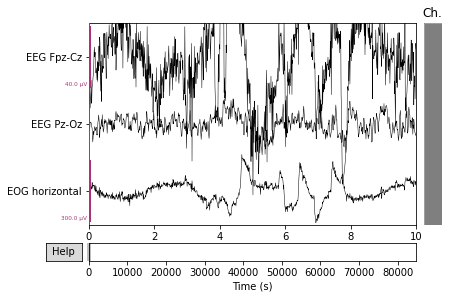

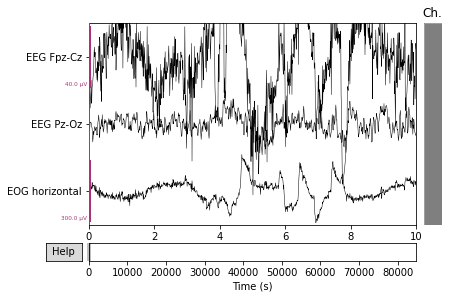

In [ ]:
raw1= mne.io.read_raw_fif('lol_raw.fif')


In [ ]:
import matplotlib.pyplot as plt

sampling_rate = 100.0

time = np.arange(0,84900, 1/sampling_rate)
data = aru

fourier_transform = np.fft.rfft(aru)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))



plt.plot(frequency, power_spectrum)

ValueError: ignored